In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("two_way.csv")
df.head()

,gender,education_level,score
0,male,school,5.51
1,male,school,5.65
2,male,school,5.07
3,male,school,5.51
4,male,school,5.94


## Summary Statistics

In [3]:
stats = df.groupby(['gender', 'education_level'])['score'].agg(['count', 'std', 'mean'])
stats

count       std      mean
gender education_level                           
female college             10  0.474694  6.463000
       school              10  0.474422  5.741000
       university          10  0.937908  8.406000
male   college              9  0.339632  6.223333
       school               9  0.363868  5.426667
       university          10  0.444542  9.292000

## Boxplot

<AxesSubplot:xlabel='gender', ylabel='score'>

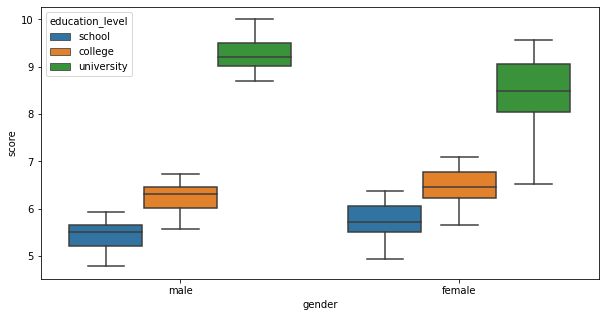

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='score', hue='education_level', data=df, linewidth=1.5)

## Interaction plot using Seaborn

<AxesSubplot:xlabel='education_level', ylabel='score'>

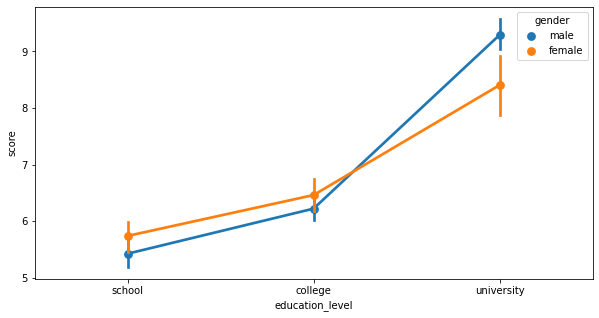

In [5]:
plt.figure(figsize=(10, 5))
ax = sns.pointplot(x='education_level', y='score', hue='gender', data=df)
ax

# Assumptions

### Outliers

In [6]:
def outliers(dep, ind1, ind2):
    dicts = {'Outliers':{}}
    for cat_ind1 in pd.unique(df[ind1]):
        for cat_ind2 in pd.unique(df[ind2]):
            Q1, Q3 = np.percentile(df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2], [25,75])
            IQR = Q3-Q1
            lower_fence, upper_fence= Q1-(1.5*IQR), Q3+(1.5*IQR)
            new_dataset = []
            for i in df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2]:
                if i < lower_fence or i > upper_fence:
                    new_dataset.append(i)
            dicts['Outliers'][f'{cat_ind1} and {cat_ind2}'] = new_dataset
    return pd.DataFrame(dicts)

In [7]:
outliers('score', 'gender', 'education_level')

,Outliers
female and college,[]
female and school,[]
female and university,[]
male and college,[]
male and school,[]
male and university,[]


### Normality

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('score ~ gender*education_level', data=df).fit()

C:\ProgramData\Anaconda3\envs\All\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [9]:
mod.resid

0     0.083333
1     0.223333
2    -0.356667
3     0.083333
4     0.513333
5     0.373333
6    -0.206667
7    -0.066667
8    -0.646667
9    -0.213333
10   -0.213333
11    0.226667
12    0.226667
13    0.156667
14    0.516667
15   -0.133333
16    0.076667
17   -0.643333
18   -0.162000
19   -0.012000
20   -0.452000
21   -0.012000
22    0.708000
23    0.708000
24    0.278000
25   -0.302000
26   -0.162000
27   -0.592000
28    0.059000
29    0.199000
30   -0.521000
31   -0.091000
32    0.639000
33    0.639000
34    0.349000
35   -0.231000
36   -0.231000
37   -0.811000
38    0.057000
39    0.207000
40   -0.523000
41   -0.083000
42    0.637000
43    0.637000
44    0.347000
45   -0.233000
46   -0.233000
47   -0.813000
48   -0.146000
49    0.004000
50    0.724000
51    1.164000
52    1.014000
53    0.434000
54    0.144000
55   -0.436000
56   -1.886000
57   -1.016000
dtype: float64

In [10]:
import scipy.stats as stats
stats.shapiro(mod.resid)

ShapiroResult(statistic=0.9678589701652527, pvalue=0.1267320215702057)

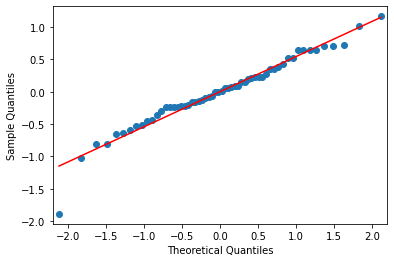

In [11]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab
sm.qqplot(mod.resid, line='r')
pylab.show()

In [12]:
def shapiro(dep, ind1, ind2):
    normality = {'Shapiro':{}}
    import scipy.stats as stats
    for cat_ind1 in pd.unique(df[ind1]):
        for cat_ind2 in pd.unique(df[ind2]):
            result = stats.shapiro(df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2])
            normality['Shapiro'][f'{cat_ind1} and {cat_ind2}'] = result
    return pd.DataFrame(normality)

In [13]:
shapiro('score', 'gender', 'education_level')

,Shapiro
female and college,"(0.9629531502723694, 0.8189500570297241)"
female and school,"(0.9629152417182922, 0.8185338973999023)"
female and university,"(0.9504411816596985, 0.6737228631973267)"
male and college,"(0.9581483602523804, 0.7787535786628723)"
male and school,"(0.980429470539093, 0.9664469361305237)"
male and university,"(0.9157170057296753, 0.3226124942302704)"


### Homogneity of variance

In [14]:
# if normality exists then perform bartlett otherwise levene's tests

In [15]:
# Null Hypothesis: the variances are equal across all samples/groups
# Alternative Hypothesis:  the variances are not equal across all samples/groups

In [16]:
def homogeneity(dep, ind1, ind2):
    combinations = []
    for gen in pd.unique(df[ind1]):
        for edu in pd.unique(df[ind2]):
            result = df[dep][df[ind1] == gen][df[ind2] == edu]
            combinations.append(result)
    from scipy.stats import bartlett
    import scipy.stats as stats
    stat, p = bartlett(combinations[0], combinations[1], combinations[2], combinations[3], combinations[4], combinations[5])
    bstat, bp = stat, p
    from scipy.stats import levene
    stat, p = levene(combinations[0], combinations[1], combinations[2], combinations[3], combinations[4], combinations[5])
    lstat, lp = stat, p
    
    homo_result = {
                'Bartlett': {
                    'stat': bstat, 
                    'p-value': bp, 
                            },
                'Levene': {
                    'stat': lstat, 
                    'p-value': lp, 
                          }
                  }
    return pd.DataFrame(homo_result)

In [17]:
homogeneity('score', 'gender', 'education_level')

,Bartlett,Levene
stat,13.265798,2.197048
p-value,0.021011,0.068560


## Two-Way ANOVA Computation

In [18]:
import pingouin as pg
df.anova(dv="score", between=["gender", "education_level"])

,Source,SS,DF,MS,F,p-unc,np2
0,gender,0.225297,1.0,0.225297,0.744721,3.921154e-01,0.014119
1,education_level,113.684117,2.0,56.842059,187.892103,1.600455e-24,0.878443
2,gender * education_level,4.439794,2.0,2.219897,7.337895,1.559245e-03,0.220107
3,Residual,15.731300,52.0,0.302525,NaN,NaN,NaN


## Post-hoct tests

### Procedure for significant two-way interaction

#### Compute simple main effects

In [19]:
# simple main effect of “education_level” on job satisfaction score

In [20]:
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

dataframes = [male, female]
index = ['male', 'female']
tables = []
for i in dataframes:
    anova = pg.anova(dv="score", between='education_level', data=i)    
    tables.append(anova)
df_anova = pd.concat(tables, keys=index, axis=0)
df_anova

,,Source,ddof1,ddof2,F,p-unc,np2
male,0,education_level,2,25,266.343479,1.394341e-17,0.955172
female,0,education_level,2,27,42.849825,4.192337e-09,0.760425


##### Compute pairwise comparisons

In [21]:
# Compare the score of the different education levels by gender levels:

In [22]:
ptest = pg.pairwise_ttests(dv='score', between=['gender', 'education_level'], padjust='bonf', data=df)
ptest

,Contrast,gender,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,gender,-,female,male,False,True,-0.470839,49.769254,two-sided,6.398128e-01,NaN,NaN,0.292,-0.123292
1,education_level,-,college,school,False,True,5.380710,36.000000,two-sided,4.674699e-06,1.402410e-05,bonf,3128.375,1.709109
2,education_level,-,college,university,False,True,-11.748040,28.243233,two-sided,2.179360e-12,6.538081e-12,bonf,8.582e+10,-3.629008
3,education_level,-,school,university,False,True,-15.147156,29.035146,two-sided,2.550292e-15,7.650877e-15,bonf,1.526e+14,-4.682959
4,gender * education_level,female,college,school,False,True,3.401987,18.000000,two-sided,3.177495e-03,1.906497e-02,bonf,12.191,1.457130
5,gender * education_level,female,college,university,False,True,-5.845081,18.000000,two-sided,1.550185e-05,9.301110e-05,bonf,967.42,-2.503549
6,gender * education_level,female,school,university,False,True,-8.017992,18.000000,two-sided,2.373516e-07,1.424110e-06,bonf,3.902e+04,-3.434244
7,gender * education_level,male,college,school,False,True,4.801656,16.000000,two-sided,1.956651e-04,1.173990e-03,bonf,110.873,2.155736
8,gender * education_level,male,college,university,False,True,-17.001394,16.603038,two-sided,6.228369e-12,3.737021e-11,bonf,8.988e+08,-7.353399
9,gender * education_level,male,school,university,False,True,-20.818437,16.869835,two-sided,1.811536e-13,1.086922e-12,bonf,1.94e+10,-9.037093


#### Compute pairwise comparisons

In [23]:
# Compare the score of the different gender levels by education levels:

In [24]:
ptest = pg.pairwise_ttests(dv='score', between=['education_level', 'gender'], padjust='bonf', data=df)
ptest

,Contrast,education_level,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,education_level,-,college,school,False,True,5.380710,36.000000,two-sided,4.674699e-06,1.402410e-05,bonf,3128.375,1.709109
1,education_level,-,college,university,False,True,-11.748040,28.243233,two-sided,2.179360e-12,6.538081e-12,bonf,8.582e+10,-3.629008
2,education_level,-,school,university,False,True,-15.147156,29.035146,two-sided,2.550292e-15,7.650877e-15,bonf,1.526e+14,-4.682959
3,gender,-,female,male,False,True,-0.470839,49.769254,two-sided,6.398128e-01,NaN,NaN,0.292,-0.123292
4,education_level * gender,college,female,male,False,True,1.274712,16.239360,two-sided,2.203489e-01,6.610468e-01,bonf,0.705,0.549499
5,education_level * gender,school,female,male,False,True,1.629331,16.621432,two-sided,1.220461e-01,3.661384e-01,bonf,0.984,0.704856
6,education_level * gender,university,female,male,False,True,-2.699402,18.000000,two-sided,1.467027e-02,4.401081e-02,bonf,3.938,-1.156201


### Procedure for non-significant two-way interaction

#### Compute Main effects

In [25]:
# Inspect main effects

In [26]:
import pingouin as pg
df.anova(dv="score", between=["gender", "education_level"])

,Source,SS,DF,MS,F,p-unc,np2
0,gender,0.225297,1.0,0.225297,0.744721,3.921154e-01,0.014119
1,education_level,113.684117,2.0,56.842059,187.892103,1.600455e-24,0.878443
2,gender * education_level,4.439794,2.0,2.219897,7.337895,1.559245e-03,0.220107
3,Residual,15.731300,52.0,0.302525,NaN,NaN,NaN


#### Compute pairwise comparisons

In [27]:
# pairwise comparisons between education level groups to determine which groups are significantly different bcz as we saw the education_level is not significant in anova results and also the interaction aswell

In [28]:
df.pairwise_ttests(dv='score', between=['education_level'], padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,education_level,college,school,False,True,5.380710,36.000000,two-sided,4.674699e-06,1.402410e-05,bonf,3128.375,1.709109
1,education_level,college,university,False,True,-11.748040,28.243233,two-sided,2.179360e-12,6.538081e-12,bonf,8.582e+10,-3.629008
2,education_level,school,university,False,True,-15.147156,29.035146,two-sided,2.550292e-15,7.650877e-15,bonf,1.526e+14,-4.682959


## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

female_college vs. female_university: Custom statistical test, P_val:9.301e-05
male_school vs. male_college: Custom statistical test, P_val:1.174e-03
male_college vs. male_university: Custom statistical test, P_val:3.737e-11
female_school vs. female_college: Custom statistical test, P_val:1.906e-02
female_school vs. female_university: Custom statistical test, P_val:1.424e-06
male_school vs. male_university: Custom statistical test, P_val:1.087e-12


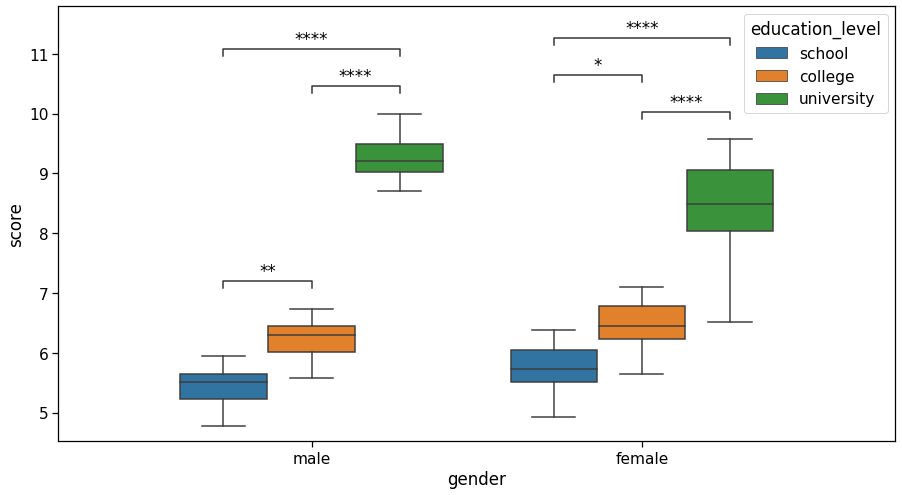

In [29]:
from statannotations.Annotator import Annotator

# subcat_palette = sns.color_palette("YlGnBu", n_colors=3)

education_level = ["school", "college", "university"]
gender = ['male', 'female']

pvalues = [1.173990e-03, 3.737021e-11, 1.086922e-12, 1.906497e-02, 9.301110e-05, 1.424110e-06]

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls..
pairs = [
    [('male', 'college'), ('male', 'school')],
    [('male', 'college'), ('male', 'university')],
    [('male', 'school'), ('male', 'university')],
    
    [('female', 'college'), ('female', 'school')],
    [('female', 'college'), ('female', 'university')],
    [('female', 'school'), ('female', 'university')],
]


plotting_parameters = {
    'data': df,
    'x': 'gender',
    'y': 'score',
    "order": gender,
    "hue": "education_level",
    "hue_order": education_level,
#     "palette": subcat_palette
}

formatted_pvalues = [f"p={p:.2e}" for p in pvalues]
with sns.plotting_context('notebook', font_scale = 1.4):

    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))
    
    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    plt.show()